<h1><center>Global Food Production</center></h1>
<h2><center>Data 601 (Fall 2020) - Group 7 (PM): Giesbrecht, Lam, Nguyen</center><h2>

## Introduction

Global food production is an important topic and vital to a healthy population. As a vital resource, effective management and productivity increases in food production need to keep pace with population growth. The total food production capacity of a country is related to available resources and productivity (e.g.: land, labour and technology). Uneven increases in food production capacity compared to population growth may lead to detrimental effects on a population and potentially cause disparities between countries.
Modern food distribution also crosses national boundaries (e.g.: imports and exports) and different countries consume and produce different foods. Comparing production, consumption, and population growth across countries will allow us to draw conclusions about how productivity is changing for different food types and see where food production improvements are not keeping pace with local population growth. 


## Dataset

This analysis will be carried out using two separate datasets. The primary dataset is the “OECD-FAO Agricultural Outlook (Edition 2020)” dataset, which was obtained from the OECD iLibrary (OECD and Food and Agriculture Organization of the United Nations, 2020). This dataset (referred to as the “Food Production dataset”) is available to University of Calgary students through the University of Calgary’s subscription to the OECD iLibrary (OECD iLibrary, 2020). The Food Production dataset contains 17 columns, of which seven contain relevant information to the analysis and the other 10 contain values that will not be used in this analysis. The columns of interest contain the country, food commodities (e.g.: wheat, beef), metric being measured (e.g.: production, consumption), year, unit of measurement, unit multiplier (e.g.: measured in thousands), and the value. The dataset contains a total of 365,560 instances, summarizing food information on 36 different OECD member countries.


The secondary dataset that will be used in this analysis is the “Total Population” dataset which has been made available for public use by the World Bank Group (The World Bank Group, 2020). This dataset, called the “Population” dataset, consists of 64 columns. There are four indexing columns (country name, country code, and the title and code of the metric). This is followed by 60 columns containing each country’s population between 1960 and 2019 (inclusive). The dataset contains the annual population of 264 different countries. In this dataset, only countries that correspond to those in the food production dataset will be used.


It should be noted that the OECD Food dataset represents the European Union as one entity. In contrast, the Population dataset from The World Bank has the member nations of the EU listed individually. As a result, the countries that have been grouped into the EU in the Food dataset will have to be identified, and the populations of these countries summed together to make a new entry in the Population dataset. A list of the countries that the OECD has considered part of the EU can be found in the glossary of (OECD and Food and Agriculture Organization of the United Nations, 2020). For simplicity sake, throughout the rest of this report the European Union will be treated as its own nation.

## Guiding Questions

Analysing food consumption and production data in comparison with population provides insight into how the dietary habits of countries are changing. They also show trends in food production  which can be beneficial for guiding a nation’s technological and agricultural research. For example, increasing trends in food consumption and population might suggest that higher productivity to match an increasing demand in future years. In addition, the incompatible production capacity may point to higher dependence on international food supplies and highlight a need to improve the effectiveness of national agricultural technology (United Nations, 2019). 
Additionally, comparing across regions may give a country insight to adjust their import and export strategies. With increasing urbanization and growing environmental concern from agricultural practices (Tilman et al, 2011), the need to understand that global food production and consumption is becoming more important. This project will answer the following questions:

1. What proportion of the world's food is (currently) produced and consumed in each region? Which countries are the main producers and consumers? Of these main producers/consumers, how much of their food comes from/goes to other countries?


2. Which countries are the largest producers and consumers of commodities in 1990 and 2019? How do the proportions of each commodity produced and consumed for a country compare against other countries and time? 


3. What are the trends in annual food commodity (crops, meat, and dairy) consumption and production for each country between 1990 to 2019? Are there any patterns observed?


4. Which regions have seen the most and least growth in agricultural production?


5. How have the food production capacities of each region changed over time relative to population? Which regions have been growing faster than their food production capacity and which regions have increased their production capacity faster than their population? What is the food production per capita for each region?


## Data Cleaning

Before visualizations can be made, some data cleaning is required. In their raw state, the datasets contain some irrelevant variables and datapoints, and are not in an ideal state for manipulation. This section will focus on producing clean dataframes that can be easily manipulated for plotting.

In [1]:
# All imported libraries to be used in this report.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from ipywidgets import interact, interact_manual
import plotly.express as px
import plotly.graph_objects as go

### Food Dataset

First, we will analyze the OECD iLibrary Food dataset and look for columns that contain abnormal amounts of empty cells and columns that contain duplicate values.

LOCATION    Country COMMODITY Commodity2 VARIABLE   Variable3  TIME  Time4  \
0      AUS  Australia        WT      Wheat       QP  Production  1990   1990   
1      AUS  Australia        WT      Wheat       QP  Production  1991   1991   
2      AUS  Australia        WT      Wheat       QP  Production  1992   1992   

  Unit Code    Unit  PowerCode Code  PowerCode  Reference Period Code  \
0     TONNE  Tonnes               3  Thousands                    NaN   
1     TONNE  Tonnes               3  Thousands                    NaN   
2     TONNE  Tonnes               3  Thousands                    NaN   

   Reference Period    Value  Flag Codes  Flags  
0               NaN  15066.1         NaN    NaN  
1               NaN  10557.4         NaN    NaN  
2               NaN  14738.7         NaN    NaN

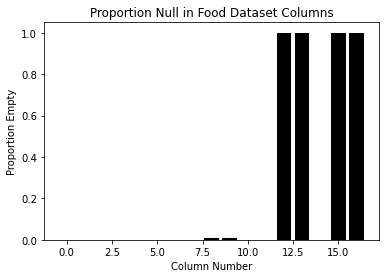

The following columns are completely empty:
['Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags']


In [2]:
food = pd.read_csv("All Countries 1990-2019.csv")
display(food.head(3))

# Look at what proportion of each column is empty.
food_null = food.isnull().sum(axis=0)/len(food)
plt.figure()
plt.bar(x=range(len(food_null.index)), height=food_null.values, color="k")
plt.ylabel("Proportion Empty")
plt.xlabel("Column Number")
plt.title("Proportion Null in Food Dataset Columns")
plt.show()

# Identify the empty columns.
print("The following columns are completely empty:")
print(list(food_null[food_null==1].index))

# Drop the completely empty columns.
food.drop(list(food_null[food_null==1].index), axis=1, inplace=True)

These four columns are 100% empty so they have been dropped from the dataset to save space and memory.

In addition to empty columns, there are several "repeat" columns that only contain abbreviated values of the columns that precede them (for example, "COMMODITY" contains abbreviations of "Commodity2", and "Time4" is a repeat of "TIME"). These columns appear to be a result of OECD's iLibrary's structure. In this context, they are unnecessary and can be dropped.

Along the same lines of a repeat column, the column "PowerCode Code" contains a numerical version of the column in "PowerCode". This power code is a multiplier for the "Value" column, and uses the equation:
$$Total Amount = Value * 10^{PowerCode}$$

To calculate a total measured value. In the "Powercode" and "PowerCode Code" columns, 0 corresponds to "Value" being an exact measured value, 3 corresponds to "Value" measured in thousands, and 6 corresponds to "Value" measured in millions of units. Once this multiplier has been used to convert the "Value" column, the "PowerCode" is no longer required and can be deleted.

In [3]:
# Drop the repeat columns.
repeat_cols = ["Unit Code", "Time4", "COMMODITY", "VARIABLE", "PowerCode"]
food.drop(repeat_cols, axis=1, inplace=True)

# Convert "Value" using "PowerCode Code" (equation above), and store in new "measured" column.
food["measured"] = food.apply(lambda x: x["Value"]*(10**x["PowerCode Code"]), axis=1)

# Now that "measured" has been calculated, "Value" and "PowerCode Code" aren't needed.
food.drop(["PowerCode Code", "Value"], axis=1, inplace=True)
# Rename the columns so they are easier to call.
food.rename(columns={"LOCATION":"Country Code", "Commodity2":"Commodity",
                "Variable3":"Variable", "TIME":"Time"}, 
            inplace=True)
food.set_index("Country Code", drop=True, inplace=True)
food.head(3)

Country Commodity    Variable  Time    Unit    measured
Country Code                                                           
AUS           Australia     Wheat  Production  1990  Tonnes  15066100.0
AUS           Australia     Wheat  Production  1991  Tonnes  10557400.0
AUS           Australia     Wheat  Production  1992  Tonnes  14738700.0

### Population Dataset

In the Population dataset from The World Bank Group, the first four rows contains background information of the dataset. Since those rows are not relevant to the scope of our analysis (and seem to cause problems when the pandas library tries to read the csv file), they are omitted. There are also two columns ("Indicator Name" and "Indicator Code") which are useful for background information within The World Bank Group's data system but have no application in this analysis. Lastly, the final column that gets read into the dataframe by pandas is completely empty. It is unclear why it is being read, but will be dropped nonetheless.

In [4]:
population = pd.read_csv("World_Bank_Population_Data.csv", skiprows=4, index_col=0)

# Drop the useless columns.
population.drop(["Indicator Name", "Indicator Code", population.columns[-1]], axis=1, inplace=True)
population.head(3)

Country Code       1960       1961       1962       1963  \
Country Name                                                            
Aruba                 ABW    54211.0    55438.0    56225.0    56695.0   
Afghanistan           AFG  8996973.0  9169410.0  9351441.0  9543205.0   
Angola                AGO  5454933.0  5531472.0  5608539.0  5679458.0   

                   1964       1965        1966        1967        1968  ...  \
Country Name                                                            ...   
Aruba           57032.0    57360.0     57715.0     58055.0     58386.0  ...   
Afghanistan   9744781.0  9956320.0  10174836.0  10399926.0  10637063.0  ...   
Angola        5735044.0  5770570.0   5781214.0   5774243.0   5771652.0  ...   

                    2010        2011        2012        2013        2014  \
Country Name                                                               
Aruba           101669.0    102046.0    102560.0    103159.0    103774.0   
Afghanistan   29185507.0  30117413.0  31161376.0  32269589.0  33370794.0   
Angola        23356246.0  24220661.0  25107931.0  26015780.0  26941779.0   

                    2015        2016        2017        2018        2019  
Country Name                                                              
Aruba           104341.0    104872.0    105366.0    105845.0    106314.0  
Afghanistan   34413603.0  35383128.0  36296400.0  37172386.0  38041754.0  
Angola        27884381.0  28842484.0  29816748.0  30809762.0  31825295.0  

[3 rows x 61 columns]

The next task is to check whether all of the countries that appear in the Food dataset are present in the Population dataset. This is achieved by comparing the three-letter country codes, as they are less likely to have spelling errors/variations than the full country names.

In [5]:
np.setdiff1d(food.index.unique(), population["Country Code"].unique())

array(['EUN'], dtype=object)

The "EUN" country code corresponds to the "European Union" entry in the Food dataset. OECD has grouped the European Union into one entity in their dataset, but The World Bank Group treats each country separately. This is dealt with by summing all of the countries populations that OECD has grouped together as European Union countries.

In [6]:
# List the countries that the OECD has grouped into the EUN entry.
eu_in_oecd = ["Austria", "Belgium", "Czech Republic", "Denmark", "Estonia",
             "Finland" ,"France", "Germany", "Greece", "Hungary", "Iceland",
             "Ireland", "Italy", "Luxembourg", "Netherlands", "Poland", "Portugal",
             "Slovak Republic", "Slovenia", "Spain", "Sweden", "Latvia",
             "Lithuania"]
# Sum the population of the EUN countries, and create a new entry in the Population dataset for it.
eu_pop = population.loc[eu_in_oecd].sum(axis=0)
eu_pop.loc["Country Code"] = "EUN"
population.loc["European Union"] = eu_pop
# Double check that all of the countries line up now.
np.setdiff1d(food.index.unique(), population["Country Code"].unique())
# Reset the index so that it will align with the Food dataset.
population.reset_index(inplace=True)
population.set_index("Country Code", drop=True, inplace=True)
population.head(3)

Country Name       1960       1961       1962       1963  \
Country Code                                                            
ABW                 Aruba    54211.0    55438.0    56225.0    56695.0   
AFG           Afghanistan  8996973.0  9169410.0  9351441.0  9543205.0   
AGO                Angola  5454933.0  5531472.0  5608539.0  5679458.0   

                   1964       1965        1966        1967        1968  ...  \
Country Code                                                            ...   
ABW             57032.0    57360.0     57715.0     58055.0     58386.0  ...   
AFG           9744781.0  9956320.0  10174836.0  10399926.0  10637063.0  ...   
AGO           5735044.0  5770570.0   5781214.0   5774243.0   5771652.0  ...   

                    2010        2011        2012        2013        2014  \
Country Code                                                               
ABW             101669.0    102046.0    102560.0    103159.0    103774.0   
AFG           29185507.0  30117413.0  31161376.0  32269589.0  33370794.0   
AGO           23356246.0  24220661.0  25107931.0  26015780.0  26941779.0   

                    2015        2016        2017        2018        2019  
Country Code                                                              
ABW             104341.0    104872.0    105366.0    105845.0    106314.0  
AFG           34413603.0  35383128.0  36296400.0  37172386.0  38041754.0  
AGO           27884381.0  28842484.0  29816748.0  30809762.0  31825295.0  

[3 rows x 61 columns]

### Data Alignment

Now that the two datasets match up by Country Code and Year, the Population dataframe can be reduced to years and countries that align with the Food dataframe. 

In [7]:
# Store the country names somewhere else.
country_codes = population["Country Name"]

# Drop the Country Name in both dataframes, and go with Country Codes with align.
population.drop("Country Name", axis=1, inplace=True)
food.drop("Country", axis=1, inplace=True)

# Convert the years in population to be integers, to match the food dataset.
population.columns = population.columns.astype(int)

# Change the population dataframe to align with the food years and country codes.
population = population.loc[food.index.unique(), food.Time.unique()]

### Food Groups

The guiding questions discuss organizing the Food dataset by three groups: crops, dairy, and meats. The commodities in the Food dataframe have been manually assembled into these three categories, except for three entries that do not fit anywhere: Biodiesel, Cotton, and Ethanol. The list of commodities that are arranged into each food group can be found below. In addition to grouping by food types, only the Production, Consumption, Exports, and Imports of food are retained from the "Variable" column.

In [8]:
crop_commodities = ["Wheat", "Maize", "Other coarse grains", "Rice", "Distiller's dry grains", "Soybean",
                    "Other oilseeds", "Vegetable oils", "Molasses", "Sugar", "Raw sugar", "White sugar", "High fructose corn syrup",
                   "Sugar beet", "Sugar cane", "ROOTS AND TUBERS", "PULSES"]
dairy_commodities = ["Milk", "Fresh dairy products", "Butter", "Cheese", "Skim milk powder", "Whole milk powder",
                    "Whey powder", "Casein"]
meat_commodities = ["Beef and veal", "Pigmeat", "Poultry meat", "Sheepmeat", "Fish", "Fish from capture",
                   "Fish from aquaculture", "Fish meal", "Fish oil", "Protein meals"]

# Only want the "Production", "Consumption", "Imports", and "Exports" entries in food.
food = food[food.Variable.apply(
    lambda x: x in ["Production", "Consumption", "Imports", "Exports"])]

# Divide the food dataset into crops, dairy, and meat dataframes.
crops = food[food.Commodity.apply(lambda x: x in crop_commodities)]
dairy = food[food.Commodity.apply(lambda x: x in dairy_commodities)]
meat = food[food.Commodity.apply(lambda x: x in meat_commodities)]

The guiding questions will now be visualized using the above crops, dairy, meat, and population dataframes.

## Guiding Question 1

What proportion of the world's food is (currently) produced and consumed in each region? Which countries are the main producers and consumers? Of these main producers/consumers, how much of their food comes from/goes to other countries?

To answer the first part of this question, the total amount of food that was consumed and produced in each region in 2019 needs to be calculated. To start, let's get rid of some of the irrelevant columns in the meat, crops, and dairy dataframes.

In [9]:
def prep_proc_data(food_group):
    if food_group=="meat":
        df = meat.copy()
    elif food_group=="crops":
        df = crops.copy()
    elif food_group=="dairy":
        df = dairy.copy()
    
    df.reset_index(inplace=True)
    # The Units are all in Tonnes, so the Unit column can be dropped.
    df.drop("Unit", axis=1, inplace=True)
    
    # Convert the Country Codes to the actual Country Name, so it is easier to read visuals.
    df["Country Code"] = country_codes.loc[df["Country Code"]].values
    df.rename(columns={"Country Code":"Country"}, inplace=True)
    
    # Only looking at the most current data (for 2019). Then drop that column as it is all homogeneous.
    return_df = df[df["Time"]==2019].copy()
    return_df.drop("Time", axis=1, inplace=True)
    
    return return_df

ques1_crops = prep_proc_data("crops")
ques1_dairy = prep_proc_data("dairy")
ques1_meat = prep_proc_data("meat")

Next, we combine the food groups and calculate the total amount of commodities that were produced and consumed, respectively, in each country.

In [10]:
def food_totals(meat, crops, dairy):
    # The Bar chart will depict the total food consumed/produced by a country only.
    total = pd.concat([meat, crops, dairy], axis=0)

    total.set_index(["Country", "Variable", "Commodity"], inplace=True)
    total = total.loc[pd.IndexSlice[:, ["Production", "Consumption"], :], :]
    total = total.groupby(["Country", "Variable"]).sum()

    world_production = sum(total.xs("Production", level=1)["measured"])
    world_consumption = sum(total.xs("Consumption", level=1)["measured"])

    total["percentage"] = total.apply(
        lambda row: row["measured"]*100/world_production if row.name[1]=="Production" else row["measured"]*100/world_consumption,
        axis=1)
    total.reset_index("Variable", inplace=True)
    total.sort_values(by=["Variable", "percentage"], ascending=False, inplace=True)
    return total

ques1_total = food_totals(ques1_meat, ques1_crops, ques1_dairy)
display(ques1_total.head(3))
display(ques1_total.tail(3))

Variable      measured  percentage
Country                                      
China    Production  1.145560e+09   15.439708
Brazil   Production  1.055005e+09   14.219220
India    Production  1.029354e+09   13.873491

Variable   measured  percentage
Country                                        
Norway       Consumption  6747511.0    0.147313
New Zealand  Consumption  5376692.0    0.117385
Switzerland  Consumption  4701128.0    0.102636

Now that we have the above dataframe to summarize the production and consumption of each country in 2019, we can plot an interactive bar chart with plotly. This plot will show the Production and Consumption of each country side-by-side so that an easy comparison can be drawn between how much of the world's food a country consumes and how much they actually produce.

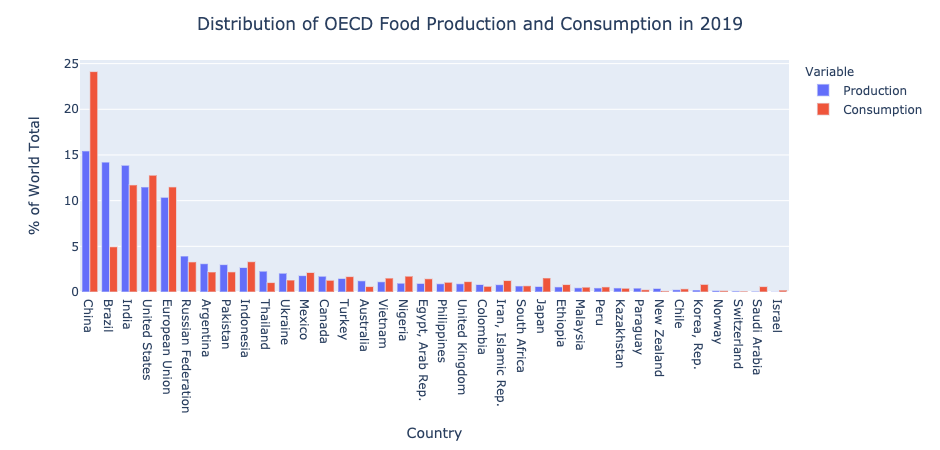

In [11]:
ques1_bar = px.bar(ques1_total,
                  x=ques1_total.index,
                  y="percentage",
                  color="Variable",
                  barmode="group")
ques1_bar.update_layout(xaxis_title="Country",
                       yaxis_title="% of World Total",
                       title="Distribution of OECD Food Production and Consumption in 2019",
                        title_x=0.5)
ques1_bar.show()

In [12]:
top5_prod_total = ques1_total[ques1_total.Variable=="Production"].iloc[:5, 2].sum()
print("The top five consuming/producing countries produce {:.2f}% of the world's food".format(top5_prod_total))
top5_cons_total = ques1_total[ques1_total.Variable=="Consumption"].iloc[:5, 2].sum()
print("The top five consuming/producing countries consume {:.2f}% of the world's food".format(top5_cons_total))
# Get a list of these top 5 consumers.
top_consumers=list(ques1_total[ques1_total.Variable=="Consumption"].sort_values(by=["measured"], ascending=False).index[:5])

The top five consuming/producing countries produce 65.39% of the world's food
The top five consuming/producing countries consume 65.07% of the world's food


This plot shows that there are five countries that consume  about 65% of the world's food (in this dataset),
and produce about the same amount. It can be observed that Brazil consumes much less than the other top five consuming countries, 
producing approximately 2.87 times more of the worlds produced food than the worlds consumed food. It is worth noting 
that, although they produce a smaller absolute magnitude, Australia and Thailand also produce a significantly 
larger proportion of the world's food than they consume. Alternatively, countries such as China, Japan, Korea, and Saudi Arabia 
consume a much larger proportion of the world's food than they produce.


Now that we have observed the countries that contribute the most to the production and consumption of the world's food, we can take a closer look into how trade occurs between these countries, and how this trade contributes to these countries feeding their populations. After some data wrangling steps, Sankey Diagrams can visualize the total food trade between the top five consuming countries as well as diagrams for the individual food commodity groups.

In [13]:
def sankey_prep(food_df):
    # Sum the amount of the commodity produced/consumed by country.
    df = food_df.set_index(["Country", "Variable", "Commodity"]).copy()
    sankey_df = df.groupby(["Country", "Variable"]).sum()
    # Will only be looking at consumption, and how it relates to exports and imports.
    sankey_df = sankey_df.loc[pd.IndexSlice[:, ["Consumption", "Exports", "Imports"]], :]
    sankey_df.reset_index("Variable", inplace=True)
    # Only interested in the top 5 consuming countries (all 36 would make a cluttered diagram).
    sankey_df = sankey_df.loc[top_consumers]
    sankey_df.sort_values(by=["Variable", "measured"], ascending=[True, False], inplace=True)
    return sankey_df

In [14]:
def sankey_branches(df):
    # Create an array of values to be used as labels in the Sankey Plot (the countries appear twice, once at the start and once at the end).
    sankey_labels = np.array(list(df.index.unique()) + ["Consumption", "World Market"] + list(df.index.unique()))
    sankey_colors = np.array(["magenta", "orange", "yellow", "cyan", "blue"] +
                              ["red", "green"] +
                              ["magenta", "orange", "yellow", "cyan", "blue"])
    
    # The first branches will represent a country's Consumption and Export.
    # Consumption branches will go from a country to a "Consumption" node. Exports will go to a "World Market" node.
    data_first_links = df[(df["Variable"]=="Consumption") | (df["Variable"]=="Exports")]
    first_links = pd.DataFrame()
    first_links["source"] = data_first_links.apply(
        lambda row: np.where(sankey_labels==row.name)[0][0],
        axis=1).reset_index(drop=True)
    # Modified this row
    first_links["target"] = data_first_links.apply(
        lambda row: np.where(sankey_labels==row.name)[0][1] if row["Variable"]=="Consumption" else np.where(
            sankey_labels=="World Market")[0][0],
        axis=1).reset_index(drop=True)
    first_links["value"] = data_first_links["measured"].reset_index(drop=True)
    
    # The second branches will go from the "World Market" to individual countries, to represent national imports.
    data_second_links = df[df["Variable"]=="Imports"]
    second_links = pd.DataFrame()
    second_links["source"] = data_second_links.apply(
        lambda row: np.where(sankey_labels=="World Market")[0][0],
        axis=1).reset_index(drop=True)
    second_links["target"] = data_second_links.apply(
        lambda row: np.where(sankey_labels==row.name)[0][1],
        axis=1).reset_index(drop=True)
    second_links["value"] = data_second_links["measured"].reset_index(drop=True)
    
    # Combine the branch data into one set.
    links = pd.concat([first_links, second_links], axis=0)
    return sankey_labels, links, sankey_colors

In [15]:
def plot_sankey(food_group):
    # Get the dataframe for plotting
    if food_group=="meat":
        df_sankey = sankey_prep(ques1_meat)
    elif food_group=="crops":
        df_sankey = sankey_prep(ques1_crops)
    elif food_group=="dairy":
        df_sankey = sankey_prep(ques1_dairy)
    elif food_group=="all food":
        df_sankey = sankey_prep(pd.concat([ques1_meat, ques1_crops, ques1_dairy], axis=0))
    # Pass along the dataframe to have node and link position and names assigned.
    sankey_labels, sankey_links, sankey_colors = sankey_branches(df_sankey)
    # Get plotting.
    fig_sankey = go.Figure(data=[go.Sankey(node=dict(
                                                    pad=15,
                                                    thickness=20,
                                                    line=dict(color="black", width=0.5),
                                                    label=sankey_labels,
                                                    color=sankey_colors),
                                           link=dict(
                                           source=sankey_links["source"],
                                           target=sankey_links["target"],
                                           value=sankey_links["value"]))])
    fig_sankey.update_layout(title_text = "Movement of " + food_group + " in between the top five countries",
                             title_x=0.5,
                             font_size=10,
                             width=700,
                             height=500)
    fig_sankey.show()

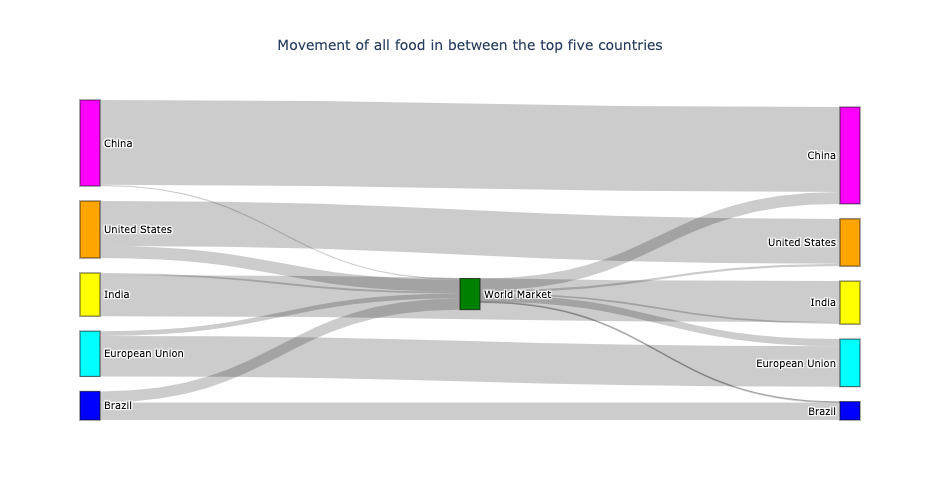

In [16]:
# First let's look at the total food trade among the top 5 consuming countries.
plot_sankey("all food")

This plot of the total food movement among the top five consuming countries depicts that the USA and Brazil export
much more than they import. China and the European Union are the opposite with their imports playing an important 
role in feeding their populations. Despite this, most of the food in the world stays within the borders of the
country that it was produced in.

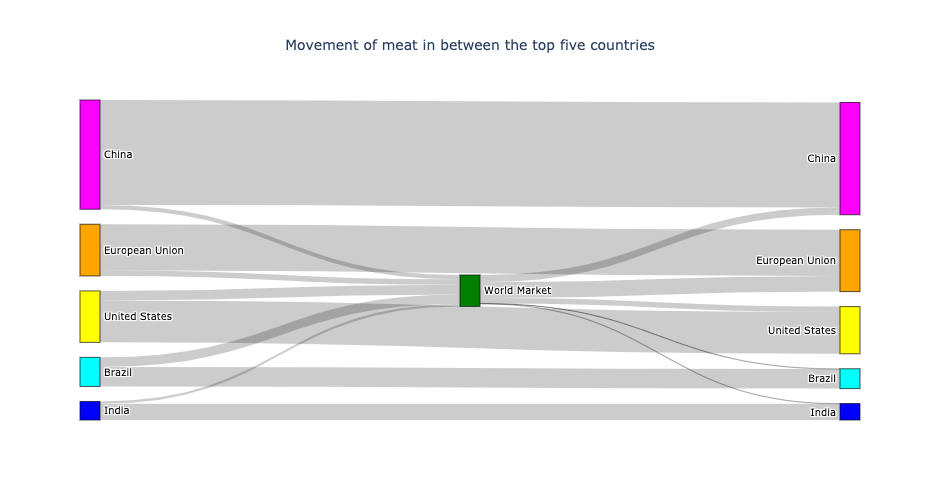

In [17]:
# Now look at the meat market among the top 5.
plot_sankey("meat")

This Sankey Diagram of the movement of meat among the top five consumers shows that the European Union imports the majority of meat, with the Brazilians and Americans supplying the majority.

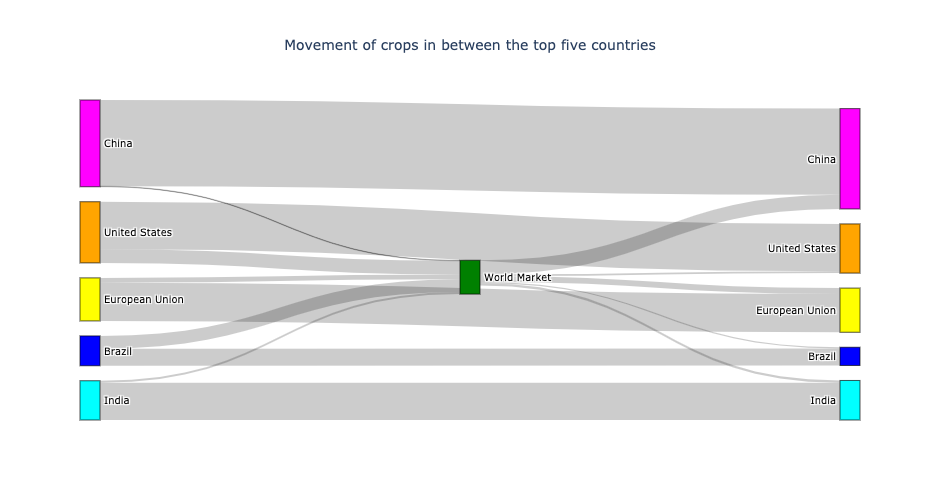

In [18]:
# How about crop trade?
plot_sankey("crops")

This Sankey Diagram of the movement of crops shows that most of the crops exported by the top five consuming countries ends up being imported by China, making up approximately 14% of their total crop consumption.

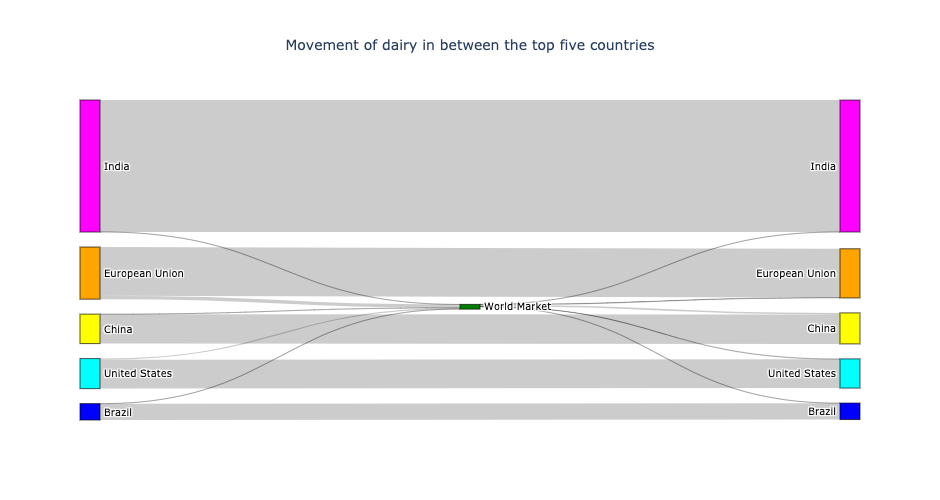

In [19]:
# Now dairy.
plot_sankey("dairy")

In stark contrast to the Sankey Diagrams of the meat and crop movement among the top five consuming countries, this plot shows that the international dairy market supplies a very small proportion of the world's consumed dairy products. It also shows that India consumes far more dairy products than any other countries. While China, on average, consumes much more food than other countries, this is not the case with dairy products.

## Guiding Question 2

Which countries are the largest producers and consumers of commodities in 1990 and 2019? How do the proportions of each commodity produced and consumed for a country compare against other countries and time? 


### Commodity Production

The data is sorted by the production variable and the commodities are summed up for each year and country to produce bar charts.

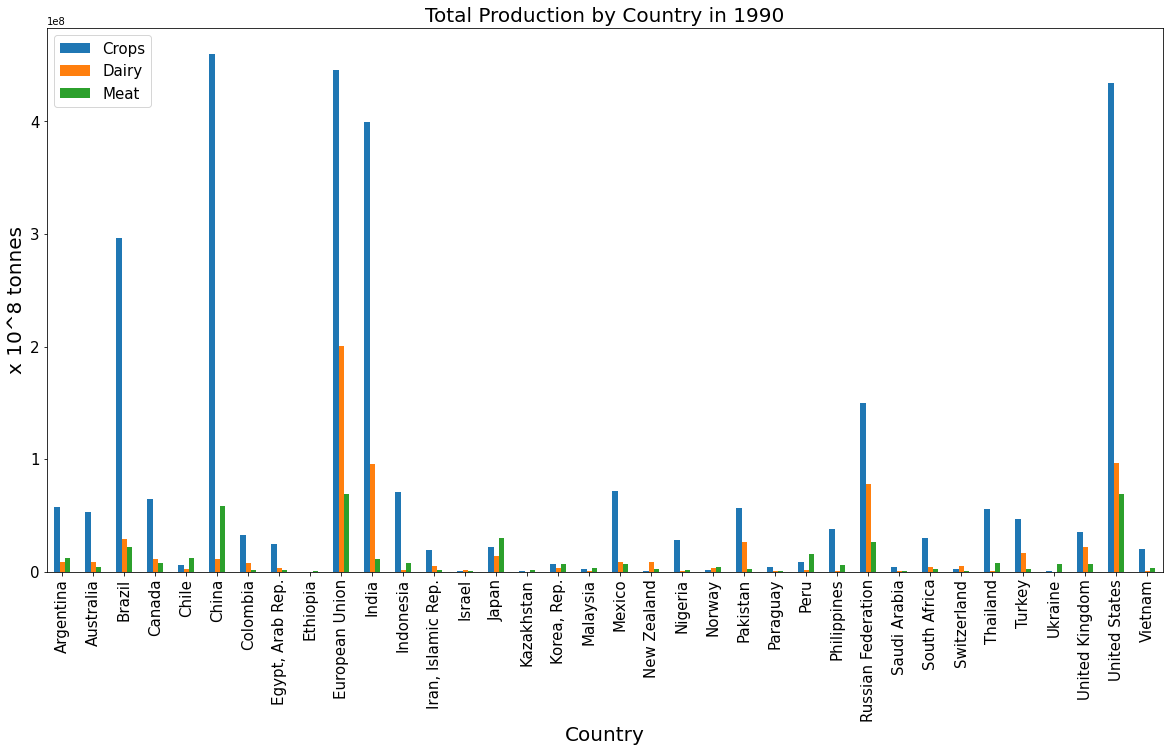

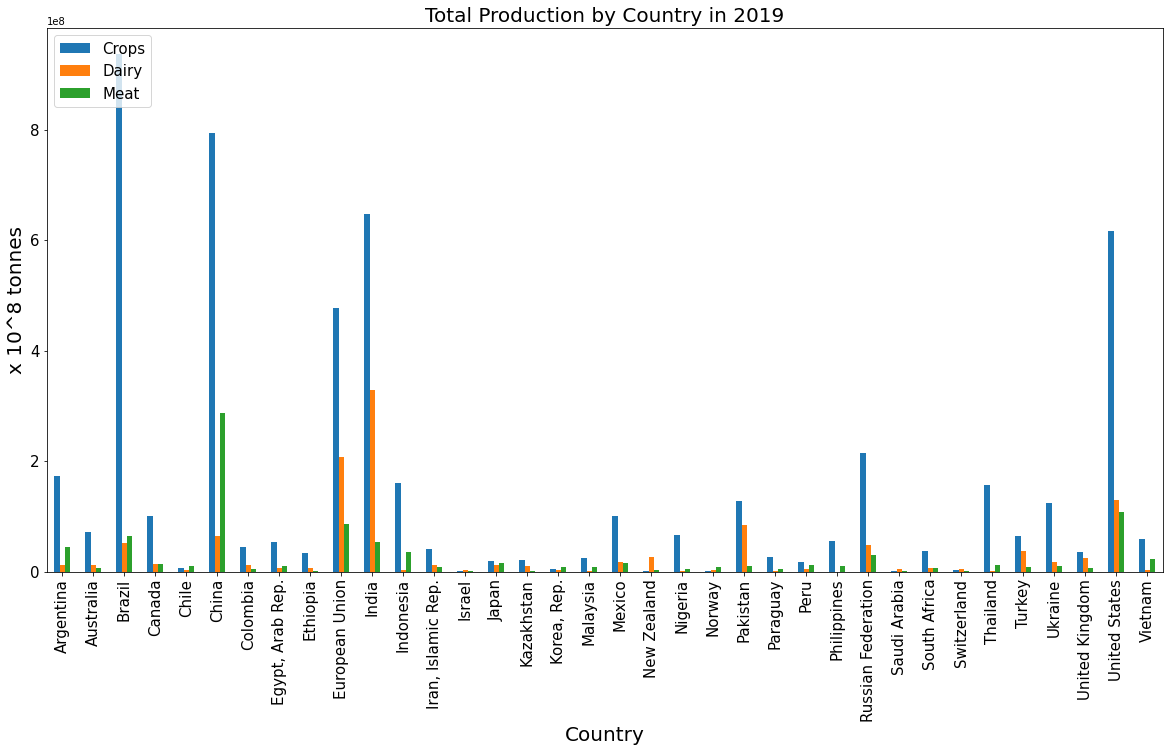

In [20]:
#Obtaining total production values for all commodities into their own separate dataframe
prod_crops = crops[crops["Variable"] == "Production"]
prod_crops.index = country_codes.loc[prod_crops.index]
prod_crops = prod_crops.groupby(["Country Name", "Time"]).sum()
prod_crops = prod_crops.rename(columns={"measured": "Crops"})

prod_dairy = dairy[dairy["Variable"] == "Production"]
prod_dairy.index = country_codes.loc[prod_dairy.index]
prod_dairy = prod_dairy.groupby(["Country Name", "Time"]).sum()
prod_dairy = prod_dairy.rename(columns={"measured": "Dairy"})

prod_meat = meat[meat["Variable"] == "Production"]
prod_meat.index = country_codes.loc[prod_meat.index]
prod_meat = prod_meat.groupby(["Country Name", "Time"]).sum()
prod_meat = prod_meat.rename(columns={"measured": "Meat"})

#Combining all production dataframes
totalprod = pd.concat([prod_crops, prod_dairy, prod_meat], axis=1)

#Total Production by Country in 1990

tp = totalprod.unstack()
tp1990 = tp.iloc[:, tp.columns.get_level_values(1)==1990]

tp1990_plot = tp1990.plot(kind='bar', figsize=(20,10), rot=90, fontsize=15)
tp1990_plot.set_ylabel("x 10^8 tonnes", fontsize=20)
tp1990_plot.set_xlabel("Country", fontsize=20)
tp1990_plot.set_title('Total Production by Country in 1990', fontsize=20)
tp1990_plot.legend(['Crops', 'Dairy', 'Meat'], loc='upper left', fontsize=15)

#Total Production by Country in 2019

tp = totalprod.unstack()
tp2019 = tp.iloc[:, tp.columns.get_level_values(1)==2019]

tp2019_plot = tp2019.plot(kind='bar', figsize=(20,10), rot=90, fontsize=15)
tp2019_plot.set_ylabel("x 10^8 tonnes", fontsize=20)
tp2019_plot.set_xlabel("Country", fontsize=20)
tp2019_plot.set_title('Total Production by Country in 2019', fontsize=20)
tp2019_plot.legend(['Crops', 'Dairy', 'Meat'], loc='upper left', fontsize=15)

In 1990, the top three producers of crop commodities, in order, are China, the grouped European Union countries and United States of America. These countries are surpassed in 2019 by Brazil, China and India with significant production increases in capacities. Regardless of the year, most countries focus their efforts in crop production compared to dairy and meat production. In 1990, the top producers of dairy commodities are EUN, United States and India. In 2019, India surpasses EUN in dairy production so the order becomes India, EUN and United States. As for meat production, the top three countries are United States, EUN and China. In 1990, USA produced the most meat, followed by EUN and China. The order changes to become China, United States and EUN in 2019.


Next, the proportion of all commodities for all the countries are calculated for the years 1990 and 2019 to produce stacked bar charts.

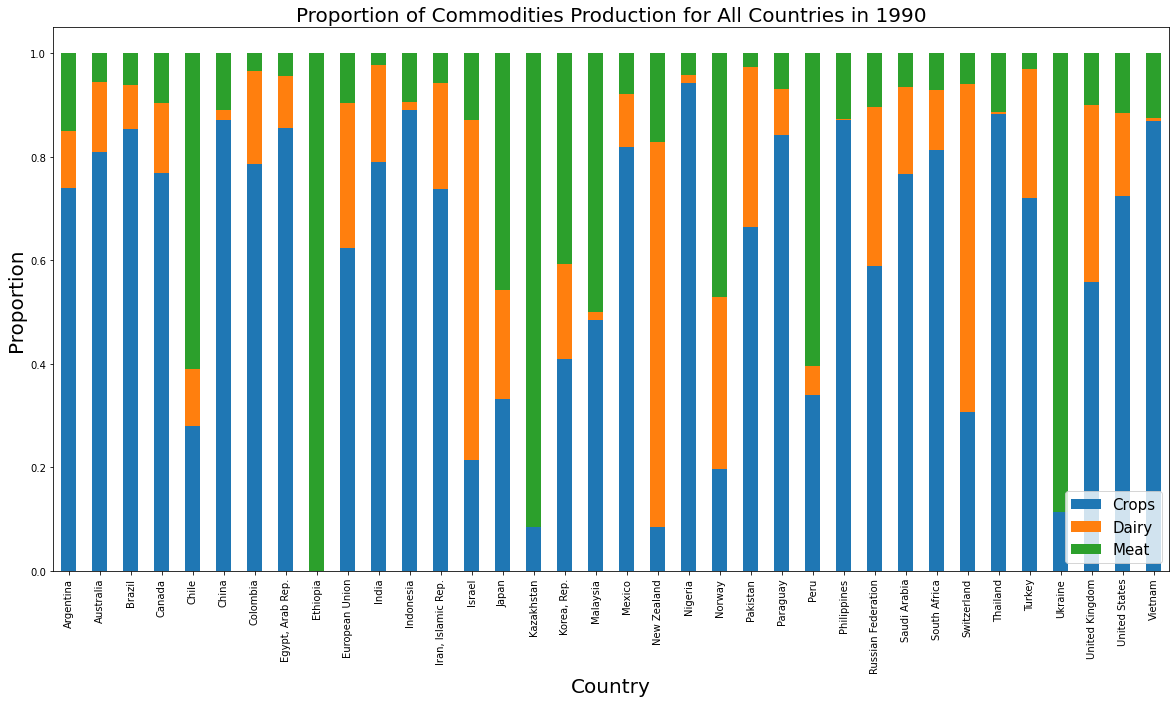

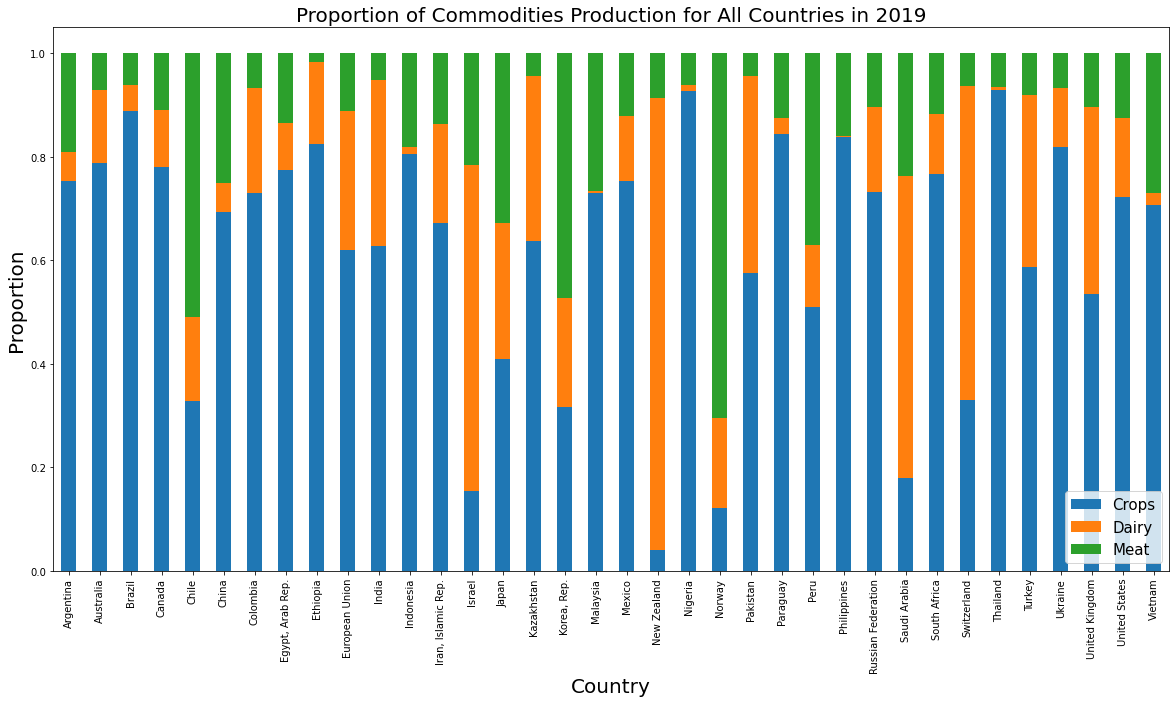

In [21]:
#Proportion of all commodities for all countries in 1990

#organizing data
tp_prop1990 = totalprod.unstack()
tp_prop1990 = tp_prop1990.iloc[:, tp_prop1990.columns.get_level_values(1)==1990]
tp_prop1990 = tp_prop1990.stack()
tp_prop1990 = tp_prop1990.reset_index(level=1, drop=True)
tp_prop1990['Crop_prop'] = tp_prop1990['Crops']/tp_prop1990.sum(axis=1)
tp_prop1990['Dairy_prop'] = tp_prop1990['Dairy']/tp_prop1990.sum(axis=1)
tp_prop1990['Meat_prop'] = tp_prop1990['Meat']/tp_prop1990.sum(axis=1)

#plotting
tp_prop1990_plot = tp_prop1990[['Crop_prop','Dairy_prop', 'Meat_prop']].plot(kind='bar', stacked=True, figsize=(20,10))
tp_prop1990_plot.set_ylabel("Proportion", fontsize=20)
tp_prop1990_plot.set_xlabel("Country", fontsize=20)
tp_prop1990_plot.set_title('Proportion of Commodities Production for All Countries in 1990', fontsize=20)
tp_prop1990_plot.legend(['Crops', 'Dairy', 'Meat'], loc='lower right', fontsize=15)


#Proportion of all commodities for all countries in 2019

#organizing data
tp_prop2019 = totalprod.unstack()
tp_prop2019 = tp_prop2019.iloc[:, tp_prop2019.columns.get_level_values(1)==2019]
tp_prop2019 = tp_prop2019.stack()
tp_prop2019 = tp_prop2019.reset_index(level=1, drop=True)
tp_prop2019['Crop_prop'] = tp_prop2019['Crops']/tp_prop2019.sum(axis=1)
tp_prop2019['Dairy_prop'] = tp_prop2019['Dairy']/tp_prop2019.sum(axis=1)
tp_prop2019['Meat_prop'] = tp_prop2019['Meat']/tp_prop2019.sum(axis=1)

#plotting
tp_prop2019_plot = tp_prop2019[['Crop_prop','Dairy_prop', 'Meat_prop']].plot(kind='bar', stacked=True, figsize=(20,10))
tp_prop2019_plot.set_ylabel("Proportion", fontsize=20)
tp_prop2019_plot.set_xlabel("Country", fontsize=20)
tp_prop2019_plot.set_title('Proportion of Commodities Production for All Countries in 2019', fontsize=20)
tp_prop2019_plot.legend(['Crops', 'Dairy', 'Meat'], loc='lower right', fontsize=15)

The relative proportions of commodities in each country further emphasizes that crop production heavily outweighs the production of dairy and meat products. Across time, each country retained focused efforts on similar proportions in each area.

It's interesting to note that Ethiopia only produced meat in 1990. Meat plays a symbolic role in Ethiopia's culture (Seleshe, et al, 2014) so they place extra attention to that aspect. In Ukraine, there is no production in dairy products and a small proportion of crop production. Since Ukraine did not join the WTO until 2008, their capacities were not aggressive and efficient enough (Nivievskyi and Cramon-Taubadel, 2008) to compete on the global market.

### Commodity Consumption

Moving on commodity consumption, the data is organized into the variable consumption where their sums are calculated for each country and year.

In [22]:
#Data manipulation for consumption of commodities

#Crops
consump_crops = crops[crops["Variable"] == "Consumption"]
consump_crops.index = country_codes.loc[consump_crops.index]
consump_crops = consump_crops.groupby(["Country Name", "Time"]).sum()
consump_crops = consump_crops.rename(columns={"measured": "Crops"})
#Dairy
consump_dairy = dairy[dairy["Variable"] == "Consumption"]
consump_dairy.index = country_codes.loc[consump_dairy.index]
consump_dairy = consump_dairy.groupby(["Country Name", "Time"]).sum()
consump_dairy = consump_dairy.rename(columns={"measured": "Dairy"})
#Meat
consump_meat = meat[meat["Variable"] == "Consumption"]
consump_meat.index = country_codes.loc[consump_meat.index]
consump_meat = consump_meat.groupby(["Country Name", "Time"]).sum()
consump_meat = consump_meat.rename(columns={"measured": "Meat"})
#Combining all consumption dataframes
totalconsump = pd.concat([consump_crops, consump_dairy, consump_meat], axis=1)

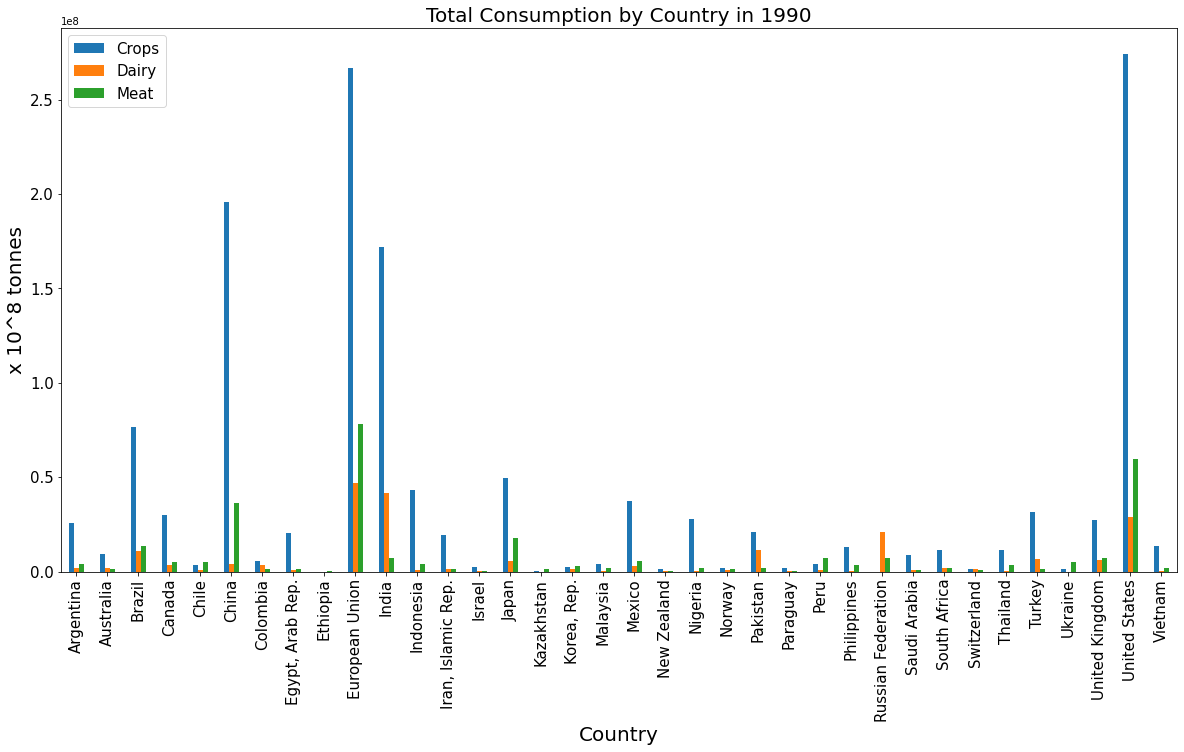

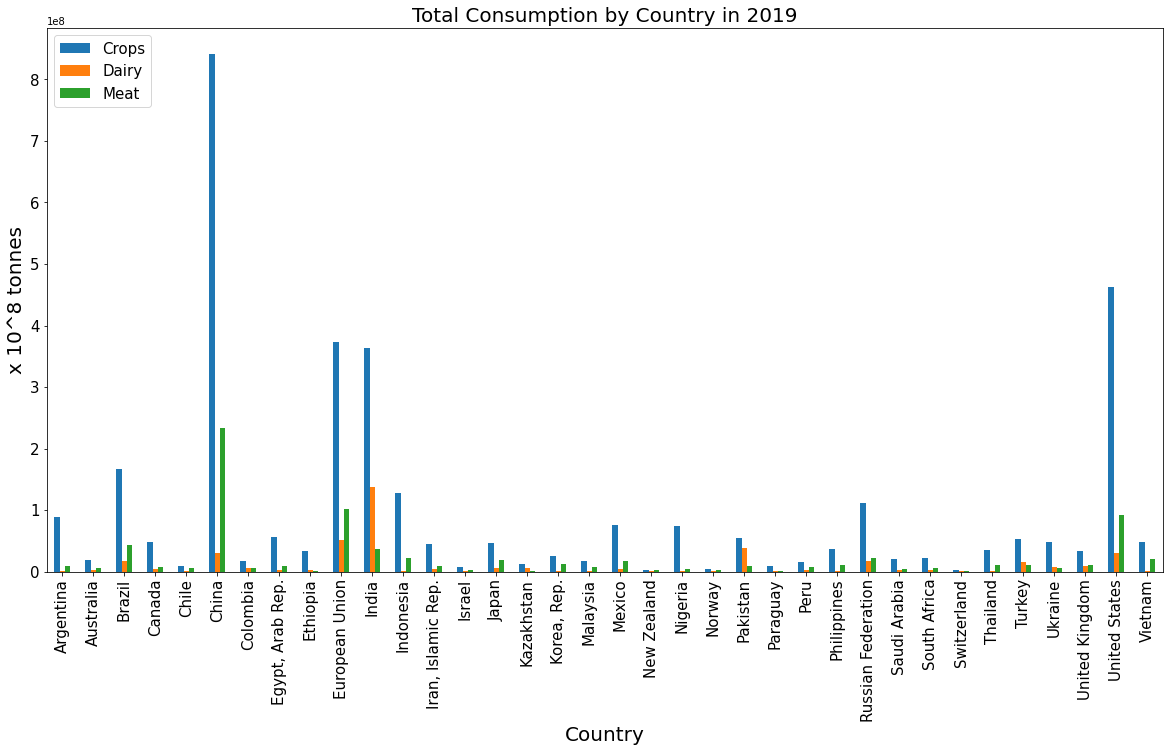

In [23]:
#Total consumption for all countries in 1990
tc = totalconsump.unstack()
tc = tc.iloc[:, tc.columns.get_level_values(1)==1990]

tc_plot = tc.plot(kind='bar', figsize=(20,10), rot=90, fontsize=15)
tc_plot.set_ylabel("x 10^8 tonnes", fontsize=20)
tc_plot.set_xlabel("Country", fontsize=20)
tc_plot.set_title('Total Consumption by Country in 1990', fontsize=20)
tc_plot.legend(['Crops', 'Dairy', 'Meat'], loc='upper left', fontsize=15)

#Total consumption for all countries in 2019
tc = totalconsump.unstack()
tc2019 = tc.iloc[:, tc.columns.get_level_values(1)==2019]

tc2019_plot = tc2019.plot(kind='bar', figsize=(20,10), rot=90, fontsize=15)
tc2019_plot.set_ylabel("x 10^8 tonnes", fontsize=20)
tc2019_plot.set_xlabel("Country", fontsize=20)
tc2019_plot.set_title('Total Consumption by Country in 2019', fontsize=20)
tc2019_plot.legend(['Crops', 'Dairy', 'Meat'], loc='upper left', fontsize=15)

The top crop consumers in 1990 are United States, EUN and China. The order changes placing China as the top crop consumer, followed by United States and EUN in 2019. The top dairy consumers in 1990 are EUN, India and United States. In 2019, the countries consuming the most dairy products are India, EUN and Pakistan. As for meat consumption, the top countries are EUN, United States and China in 1990. China takes first place followed by EUN and United States in 2019.

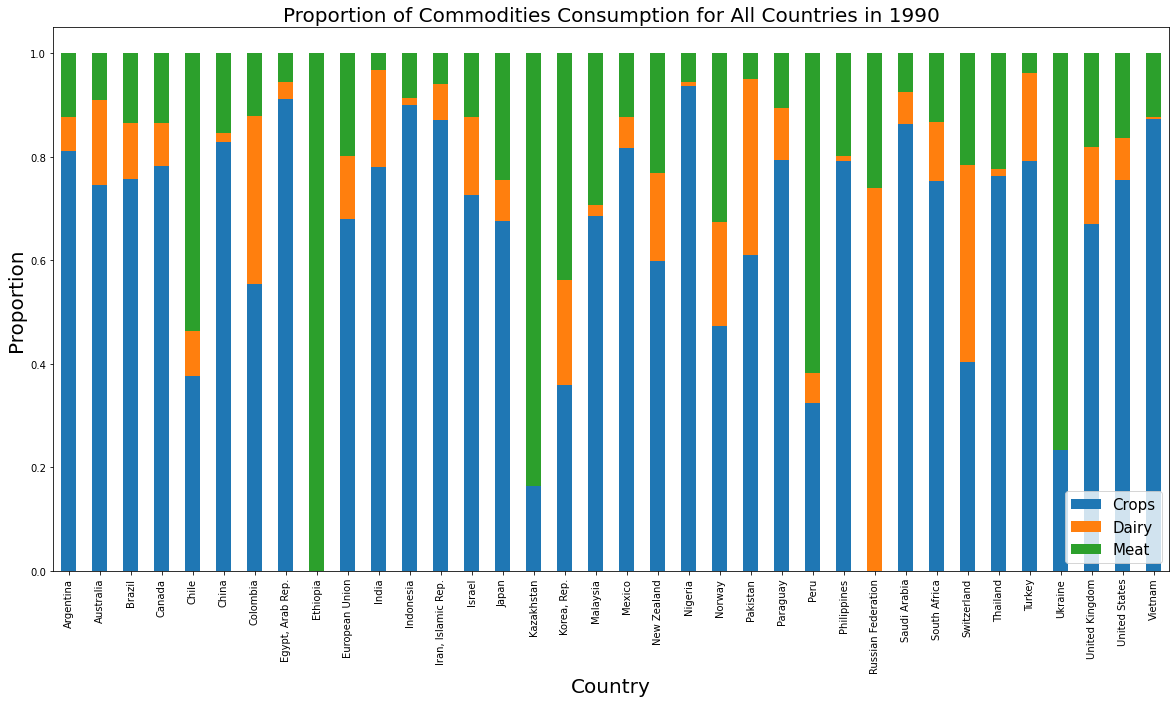

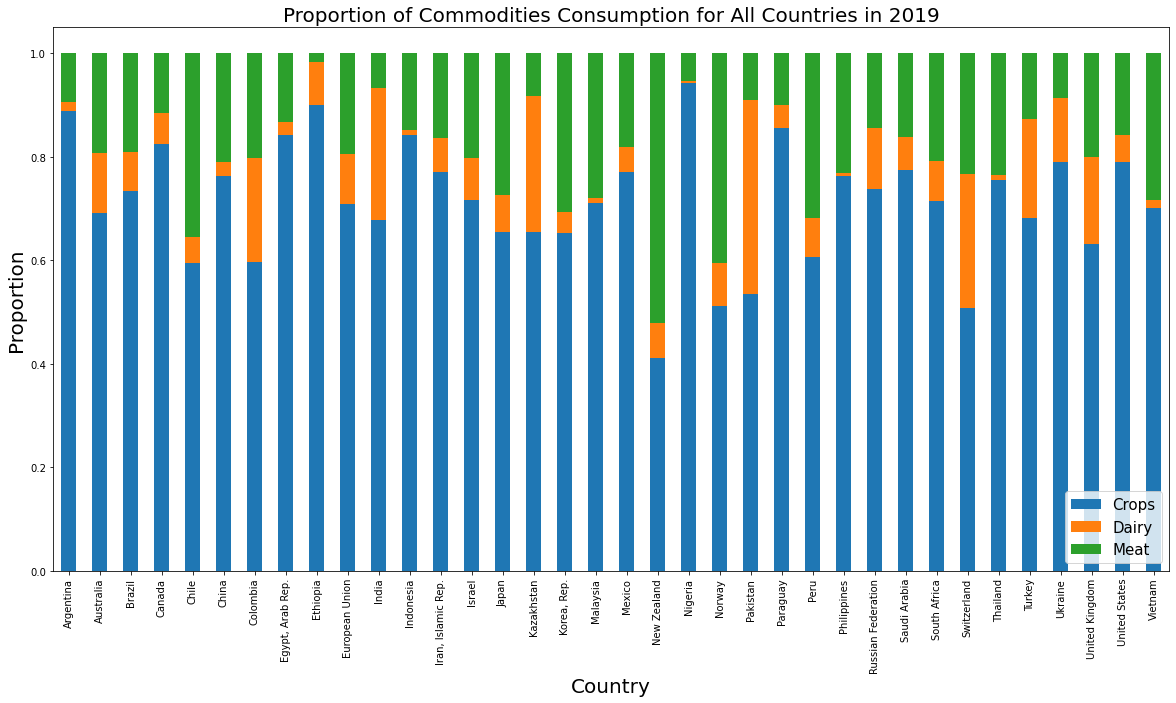

In [24]:
#Data manipulation for proportion of consumption for all countries in 1990
tc_prop1990 = totalconsump.unstack()
tc_prop1990 = tc_prop1990.iloc[:, tc_prop1990.columns.get_level_values(1)==1990]

tc_prop1990 = tc_prop1990.stack()
tc_prop1990 = tc_prop1990.reset_index(level=1, drop=True)
tc_prop1990['Crop_prop'] = tc_prop1990['Crops']/tc_prop1990.sum(axis=1)
tc_prop1990['Dairy_prop'] = tc_prop1990['Dairy']/tc_prop1990.sum(axis=1)
tc_prop1990['Meat_prop'] = tc_prop1990['Meat']/tc_prop1990.sum(axis=1)

#plotting
tc_prop1990_plot = tc_prop1990[['Crop_prop','Dairy_prop', 'Meat_prop']].plot(kind='bar', stacked=True, figsize=(20,10))
tc_prop1990_plot.set_ylabel("Proportion", fontsize=20)
tc_prop1990_plot.set_xlabel("Country", fontsize=20)
tc_prop1990_plot.set_title('Proportion of Commodities Consumption for All Countries in 1990', fontsize=20)
tc_prop1990_plot.legend(['Crops', 'Dairy', 'Meat'], loc='lower right', fontsize=15)

#Data manipulation for proportion of consumption for all countries in 2019
tc_prop2019 = totalconsump.unstack()
tc_prop2019 = tc_prop2019.iloc[:, tc_prop2019.columns.get_level_values(1)==2019]

tc_prop2019 = tc_prop2019.stack()
tc_prop2019 = tc_prop2019.reset_index(level=1, drop=True)
tc_prop2019['Crop_prop'] = tc_prop2019['Crops']/tc_prop2019.sum(axis=1)
tc_prop2019['Dairy_prop'] = tc_prop2019['Dairy']/tc_prop2019.sum(axis=1)
tc_prop2019['Meat_prop'] = tc_prop2019['Meat']/tc_prop2019.sum(axis=1)

#plotting
tc_prop2019_plot = tc_prop2019[['Crop_prop','Dairy_prop', 'Meat_prop']].plot(kind='bar', stacked=True, figsize=(20,10))
tc_prop2019_plot.set_ylabel("Proportion", fontsize=20)
tc_prop2019_plot.set_xlabel("Country", fontsize=20)
tc_prop2019_plot.set_title('Proportion of Commodities Consumption for All Countries in 2019', fontsize=20)
tc_prop2019_plot.legend(['Crops', 'Dairy', 'Meat'], loc='lower right', fontsize=15)

Across time, most countries consume the most crops relative to dairy and meat products. There are some notable differences between 1990 and 2019. Ethiopia has significantly decreased their relative meat consumption and increased their crop consumption. They also have added dairy products to their diet. Kazakhstan and Ukraine has followed a similar pattern where they have substituted meat for crops while introducing dairy into their diet. Russia has substituted a large proportion of dairy for crop commodities. 

## Guiding Question 3

What are the trends in annual food commodity (crops, meat, and dairy) consumption and production for each country between 1990 to 2019? Are there any patterns observed?

In [25]:
tc3 = totalconsump.unstack()
tp3 = totalprod.unstack()

# Consumption Plots.
crops_cons_scatt = go.Scatter(name="Crop Consumption")
meat_cons_scatt = go.Scatter(name="Meat Consumption")
dairy_cons_scatt = go.Scatter(name="Dairy Consumption")

# Production Plots.
crops_prod_scatt = go.Scatter(name="Crop Production")
meat_prod_scatt = go.Scatter(name="Meat Production")
dairy_prod_scatt = go.Scatter(name="Dairy Production")

#Widget features
fig_scatt3 = go.FigureWidget(data=[crops_cons_scatt, meat_cons_scatt, dairy_cons_scatt,
                                  crops_prod_scatt, meat_prod_scatt, dairy_prod_scatt])
fig_scatt3.update_yaxes()


@interact(country=tc3.index.unique())
def update_scatt3(country="Argentina"):
    cons3 = tc3.loc[country].unstack(level=0)
    cons3.reset_index(inplace=True)

    prod3 = tp3.loc[country].unstack(level=0)
    prod3.reset_index(inplace=True)

    fig_scatt3.update_traces(x=cons3["Time"])
    fig_scatt3.for_each_trace(lambda trace:
                             trace.update(y=cons3["Crops"]) if trace.name=="Crop Consumption" else trace.update(
                             y=cons3["Meat"]) if trace.name=="Meat Consumption" else trace.update(
                             y=cons3["Dairy"]) if trace.name=="Dairy Consumption" else trace.update(
                             y=prod3["Crops"]) if trace.name=="Crop Production" else trace.update(
                             y=prod3["Meat"]) if trace.name=="Meat Production" else trace.update(
                             y=prod3["Dairy"]))
    fig_scatt3.update_layout(title_text='Consumption and Production of Commodities in ' + country, xaxis_title='Year',
                             yaxis_title='Tonnes')

fig_scatt3

interactive(children=(Dropdown(description='country', options=('Argentina', 'Australia', 'Brazil', 'Canada', '…

FigureWidget({
    'data': [{'name': 'Crop Consumption',
              'type': 'scatter',
              'uid':…

Most countries follow the pattern where they produced more than they consumed for all three commodities. The trends over the years 1990 to 2019 show that the same countries have stable or increasing production and consumption for the crops, dairy, and meat commodities. These countries include Argentina, Australia, Brazil, Canada, Columbia, Ethiopia, European Union, Indonesia, India, Kazakhstan, Mexico, Malaysia, New Zealand, Pakistan, Peru, Philippines, Paraguay, Russia, Thailand, Turkey, Ukraine, United States, Vietnam and South Africa. 

Another trend observed is that China, Chile, Egypt, Iran, Nigeria, and Norway consume more than they are producing for crops. Countries that consume more than the production of meat include Switzerland, United Kingdom, and Saudi Arabia. Countries that consume more than the production of crops and meat include Israel, Japan and South Korea.

When a country produces more than the amount they consume for a given type of commodity, they can feed their citizens  or export them to other countries. When a country does not produce enough commodities, they will have to rely on imports from other countries or they substitute consumption of a commodity for another type. 

## Guiding Question 4

Which regions have seen the most and least growth in agricultural production?

To investigate which countries have seen the most and least growth in agricultural production since 1990, we calculate the ratio of growth rate for each country in producing commodity types - crops, meat, and dairy, using this formula (University of Oregon, 2020):

$$\frac{\text{Commodity production of 2019} - \text{Commodity production of 1990}}{\text{Commodity production 1990}}$$

The following codes attempt to filter and combine the datasets of year 1990 and 2019. The national calculated growth rates will be classified into bins by their magnitudes. Then, a choropleth map for each commodity type will demonstrate countries and their growth rate bin groups.

In [26]:
#Filter datasets for production variable
crop_df = crops.reset_index()
meat_df = meat.reset_index()
dairy_df = dairy.reset_index()
pop_df = population.copy()
codes_df = pd.DataFrame(country_codes)

crop_p = crop_df[crop_df.Variable == 'Production']
meat_p = meat_df[meat_df.Variable == 'Production']
dairy_p = dairy_df[dairy_df.Variable == 'Production']

In [27]:
#Group data by Country Code and Time
crop_product = crop_p.groupby(['Country Code', 'Time']).sum()
meat_product = meat_p.groupby(['Country Code', 'Time']).sum()
dairy_product = dairy_p.groupby(['Country Code', 'Time']).sum()

In [28]:
#filter data of 2019 and 1990
c1990 = crop_p[crop_p.Time == 1990].groupby(['Country Code','Time']).sum()
c2019 = crop_p[crop_p.Time == 2019].groupby(['Country Code', 'Time']).sum()

m1990 = meat_p[meat_p.Time == 1990].groupby(['Country Code','Time']).sum()
m2019 = meat_p[meat_p.Time == 2019].groupby(['Country Code', 'Time']).sum()

d1990 = dairy_p[dairy_p.Time == 1990].groupby(['Country Code','Time']).sum()
d2019 = dairy_p[dairy_p.Time == 2019].groupby(['Country Code', 'Time']).sum()

#rename the production total measured column to show the year of data
c1990.rename(columns = {'measured' : 'production1990'}, inplace = True)
c2019.rename(columns = {'measured' : 'production2019'}, inplace = True)

m1990.rename(columns = {'measured' : 'production1990'}, inplace = True)
m2019.rename(columns = {'measured' : 'production2019'}, inplace = True)

d1990.rename(columns = {'measured' : 'production1990'}, inplace = True)
d2019.rename(columns = {'measured' : 'production2019'}, inplace = True)

#Drop the Time index column
c1990 = pd.DataFrame(c1990.values, index = c1990.index.droplevel(1), columns = c1990.columns)
c2019 = pd.DataFrame(c2019.values, index = c2019.index.droplevel(1), columns = c2019.columns)

m1990 = pd.DataFrame(m1990.values, index = m1990.index.droplevel(1), columns = m1990.columns)
m2019 = pd.DataFrame(m2019.values, index = m2019.index.droplevel(1), columns = m2019.columns)

d1990 = pd.DataFrame(d1990.values, index = d1990.index.droplevel(1), columns = d1990.columns)
d2019 = pd.DataFrame(d2019.values, index = d2019.index.droplevel(1), columns = d2019.columns)

country_name = codes_df.loc[c1990.index]

#Merge data of year 1990 and 2019
growth_crop =  c1990.merge(c2019, on ='Country Code', how = 'left')
growth_crop =  country_name.merge(growth_crop, on ='Country Code', how = 'left')

growth_meat =  m1990.merge(m2019, on ='Country Code', how = 'left')
growth_meat =  country_name.merge(growth_meat, on ='Country Code', how = 'left')

growth_dairy =  d1990.merge(d2019, on ='Country Code', how = 'left')
growth_dairy =  country_name.merge(growth_dairy, on ='Country Code', how = 'left')

#calculate growth rates
growth_crop['Crops Growth Rate'] = (growth_crop['production2019'] - growth_crop['production1990']) / growth_crop['production1990']
growth_meat['Meat Growth Rate'] = (growth_meat['production2019'] - growth_meat['production1990']) / growth_meat['production1990']
growth_dairy['Dairy Growth Rate'] = (growth_dairy['production2019'] - growth_dairy['production1990']) / growth_dairy['production1990']

#Creating growth rate bins for choropleth maps.
growth_crop['CGR bin'] = pd.cut(x = growth_crop['Crops Growth Rate'], bins = (-1, 0, 0.25, 0.5, 0.75, 1, 10000000000), right = False, 
                             labels = ['[-1, 0)', '[0, 0.25)', '[0.25 to 0.5)', '[0.5, 0.75)', '[0.75, 1)', '[Greater than 1]'])

growth_meat['MGR bin'] = pd.cut(x = growth_meat['Meat Growth Rate'], bins = (-1, 0, 0.25, 0.5, 0.75, 1, 10000000000), right = False, 
                             labels = ['[-1, 0)', '[0, 0.25)', '[0.25 to 0.5)', '[0.5, 0.75)', '[0.75, 1)', '[Greater than 1]'])

growth_dairy['DGR bin'] = pd.cut(x = growth_dairy['Dairy Growth Rate'], bins = (-1, 0, 0.25, 0.5, 0.75, 1, 10000000000), right = False, 
                             labels = ['[-1, 0)', '[0, 0.25)', '[0.25 to 0.5)', '[0.5, 0.75)', '[0.75, 1)', '[Greater than 1]'])

for i in eu_in_oecd:
    code_temp = country_codes[country_codes==i].index[0]
    crop_temp = list(growth_crop.loc["EUN", ["production1990", "production2019", "Crops Growth Rate", "CGR bin"]].values)
    crop_temp.insert(0, "European Union")
    growth_crop.loc[code_temp] = crop_temp
    
    meat_temp = list(growth_meat.loc["EUN", ["production1990", "production2019", "Meat Growth Rate", "MGR bin"]].values)
    meat_temp.insert(0, "European Union")
    growth_meat.loc[code_temp] = meat_temp
    
    dairy_temp = list(growth_dairy.loc["EUN", ["production1990", "production2019", "Dairy Growth Rate", "DGR bin"]].values)
    dairy_temp.insert(0, "European Union")
    growth_dairy.loc[code_temp] = dairy_temp

### Crops Production Growth Rates

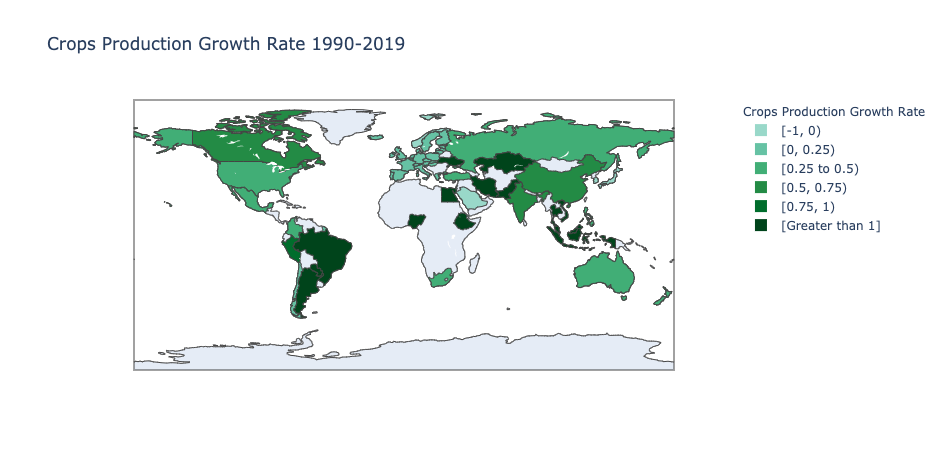

In [29]:
figc = px.choropleth(growth_crop.sort_values(by = 'CGR bin'), 
                     locations = growth_crop.sort_values(by = 'CGR bin').index,
                     color='CGR bin',
                     hover_name='Country Name',
                     color_discrete_sequence = ['#99d8c9', 
                                                '#66c2a4', 
                                                '#41ae76', 
                                                '#238b45', 
                                                '#006d2c', 
                                                '#00441b'],
                     labels={'CGR bin':'Crops Production Growth Rate'},
                     title = "Crops Production Growth Rate 1990-2019")

figc.show()

The choropleth map displays 36 OECD countries and their crops production growth rate since 1990. After three decades, the majority of OECD countries in South America, North Africa, Middle East and South East Asia have seen significant increase in plant-based agricultural products by at least 75%. Canada, India, and China crops production have grown by 50-75% whereas the product growth rate of other large countries (such as the USA, Australia, and Russian Federation) have increased 25-50%. Saudi Arabia and the northern European OECD countries have neither observed any changes during the time period nor have reduced their crops production rate. 

### Meat Production Growth Rates

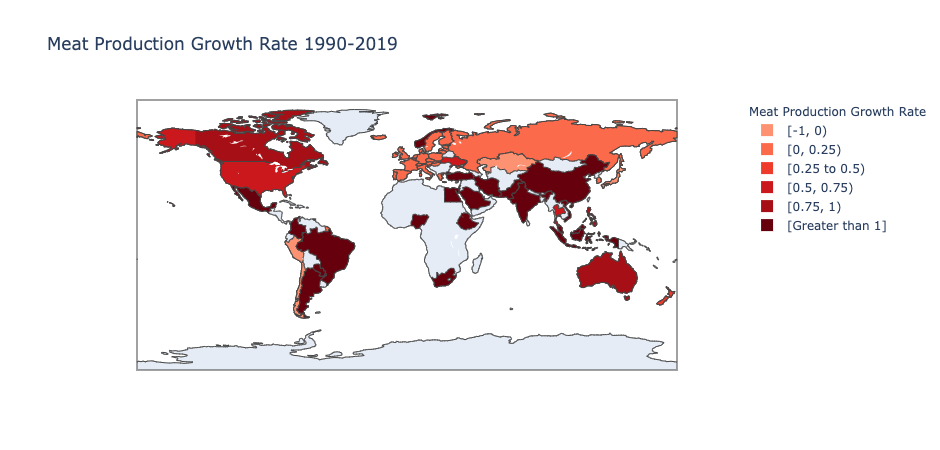

In [30]:
figm = px.choropleth(growth_meat.sort_values(by = 'MGR bin'), 
                     locations = growth_meat.sort_values(by = 'MGR bin').index,
                     color='MGR bin',
                     hover_name='Country Name',
                     color_discrete_sequence = ['#fc9272', 
                                                '#fb6a4a', 
                                                '#ef3b2c', 
                                                '#cb181d', 
                                                '#a50f15', 
                                                '#67000d'],
                     labels={'MGR bin':'Meat Production Growth Rate'},
                     title = "Meat Production Growth Rate 1990-2019")

figm.show()

In general, most countries' meat production rates have increased by at least 50% compared to their data in 1990. All OECD African countries meat production in 2019 have been at least double the production amount in 1990, while the majority of Asian OECD countries have observed at least 75% increase in meat production growth rates since 1990. Countries with high crops production growth rates tend to have high meat production growth rate. A few countries, however, demonstrate opposite trends in agricultural developments - that is, showing increase in crops production but decrease in meat production (Peru, Kazakhstan, and Chile) and vice versa (Saudi Arabia and Norway).

### Dairy Production Growth Rates

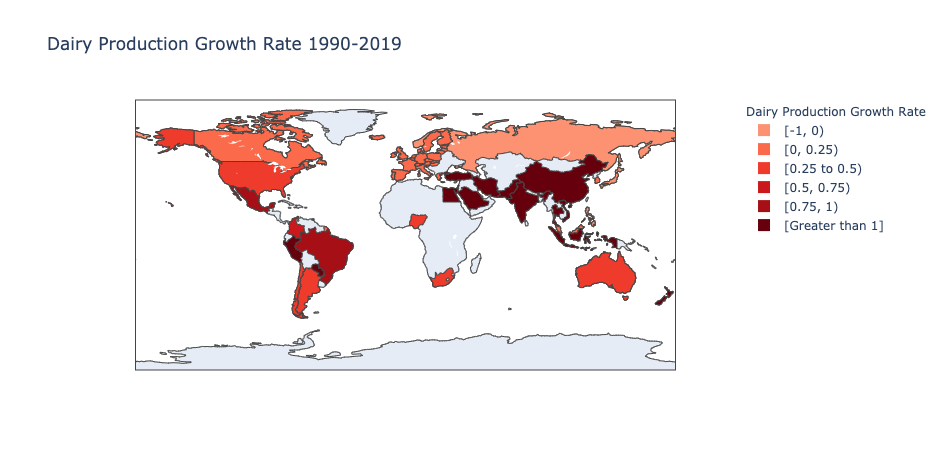

In [31]:
#note: there are a few countries with 0 production in 1990, which result in inf values in 'DGR' columns and NaN values in 'DGR bin'.
figd = px.choropleth(growth_dairy.sort_values(by = 'DGR bin').dropna(), 
                     locations = growth_dairy.sort_values(by = 'DGR bin').dropna().index,
                     color='DGR bin',
                     hover_name='Country Name',
                     color_discrete_sequence = ['#fc9272', 
                                                '#fb6a4a', 
                                                '#ef3b2c', 
                                                '#cb181d', 
                                                '#a50f15', 
                                                '#67000d'],
                     labels={'DGR bin':'Dairy Production Growth Rate'},
                     title = "Dairy Production Growth Rate 1990-2019")

figd.show()

During the time period from 1990 to 2019, all Oceanian, American and southern African OECD countries have seen an increase by at least 25% in their dairy production rate. Northern African and the majority of Asian OECD countries have increased their dairy production by at least 100%. These countries also demonstrate the most significant changes in their food production, except for Japan - the only country whose crops, meat, and dairy production growth rates have dropped during the last three decades. Russian Federation as well as northern European countries who are not parts of the European Union (such as Norway and the United Kingdom) have showed less than 25% increase in their food production growth rate.

## Guiding Question 5: 

How have the food production capacities of each region changed over time relative to population? Which regions have been growing faster than their food production capacity and which regions have increased their production capacity faster than their population? What is the food production per capita for each region?

### Food production per capita

Within the last thirty years, robust advances in technology and sciences have contributed to the general agricultural development trends and subsequently the world population. Observing solely the amount of food production may be inadequate to evaluate an individual country's productivity growth (United Nations, 2019). To better understand the world food production via the data of 36 OECD countries, we compute annual production per capita ratios, which can show how a country's food production capacities has changed over time relative to their population. Annual production per capita of a country is the ratio of their commodity production in a year over the national population recorded for that same year. If a country's commodity production per capita ratios have shown a descending trend during the 30 years of observation, it may raise a potential concern wherein that country will not produce enough commodity to supply for their population and will have to reach international food sources (import or trading). If the ratios remain relatively stable or increasing overtime, the country's production had been able to catch up with their population growth (United Nations, 2019).

In the cells below, the food production per capita is calculated for each country by each year. The annual food production per capita of each country will by demonstrated as interactive line charts for convenience. Moreover, annual food production per capita ratios of the top ten countries with the highest production will be plotted together for comparison.

In [32]:
#Apply function to calculate production:population ratio to rows of dataframe
crop_product['per capita'] = crop_product.apply(lambda row: row['measured']/pop_df.loc[row.name[0], row.name[1]], axis=1)
meat_product['per capita'] = meat_product.apply(lambda row: row['measured']/pop_df.loc[row.name[0], row.name[1]], axis=1)
dairy_product['per capita'] = dairy_product.apply(lambda row: row['measured']/pop_df.loc[row.name[0], row.name[1]], axis=1)

#Checking the outputs
display(dairy_product.head())

#Drop column that no longer use: measured
crop_product.drop(columns = 'measured', inplace = True)
meat_product.drop(columns = 'measured', inplace = True)
dairy_product.drop(columns = 'measured', inplace = True)

measured  per capita
Country Code Time                        
ARG          1990   8569551.0    0.262719
             1991   8532244.0    0.257935
             1992   8709472.0    0.259757
             1993   9146854.0    0.269262
             1994  10031125.0    0.291580

### Interactive Line Charts for Individual Country's Production per Capita Ratio

In [33]:
cscatt = go.Scatter()
fig_cscatt = go.FigureWidget(data=cscatt)
fig_cscatt.update_yaxes()

@interact(Country= country_codes.loc[crop_product.index.unique(level=0)].values)
def update_cscatt(Country="Australia"):
    country_code = country_codes[country_codes==Country].index[0]
    data = crop_product.loc[country_code, 'per capita']
    fig_cscatt.update_traces(go.Scatter(x=crop_product.loc[country_code, 'per capita'].index,
                                y=crop_product.loc[country_code, 'per capita'].values,
                                name=Country))
    
    fig_cscatt.update_layout(title_text='Crop Production per Capita (1990-2019) of ' + Country)
fig_cscatt

interactive(children=(Dropdown(description='Country', index=1, options=('Argentina', 'Australia', 'Brazil', 'C…

FigureWidget({
    'data': [{'name': 'Australia',
              'type': 'scatter',
              'uid': 'af740…

In [34]:
mscatt = go.Scatter()
fig_mscatt = go.FigureWidget(data=mscatt)
fig_mscatt.update_yaxes()

@interact(Country=country_codes.loc[crop_product.index.unique(level=0)].values)
def update_mscatt(Country="Australia"):
    country_code = country_codes[country_codes==Country].index[0]
    data = meat_product.loc[country_code, 'per capita']
    fig_mscatt.update_traces(go.Scatter(x=meat_product.loc[country_code, 'per capita'].index,
                                y=meat_product.loc[country_code, 'per capita'].values,
                                name=Country))
    
    fig_mscatt.update_layout(title_text='Meat Production per Capita (1990-2019) of ' + Country)
fig_mscatt

interactive(children=(Dropdown(description='Country', index=1, options=('Argentina', 'Australia', 'Brazil', 'C…

FigureWidget({
    'data': [{'name': 'Australia',
              'type': 'scatter',
              'uid': '6ba4a…

In [35]:
dscatt = go.Scatter()
fig_dscatt = go.FigureWidget(data=dscatt)
fig_dscatt.update_yaxes()

@interact(Country=country_codes.loc[crop_product.index.unique(level=0)].values)
def update_dscatt(Country="Australia"):
    country_code = country_codes[country_codes==Country].index[0]
    data = dairy_product.loc[country_code, 'per capita']
    fig_dscatt.update_traces(go.Scatter(x=dairy_product.loc[country_code, 'per capita'].index,
                                y=dairy_product.loc[country_code, 'per capita'].values,
                                name=Country))
    
    fig_dscatt.update_layout(title_text='Dairy Production per Capita (1990-2019) of ' + Country)
fig_dscatt

interactive(children=(Dropdown(description='Country', index=1, options=('Argentina', 'Australia', 'Brazil', 'C…

FigureWidget({
    'data': [{'name': 'Australia',
              'type': 'scatter',
              'uid': 'cb55b…

### Line Charts for Top Ten Countries with Highest Food Production per Capitas

In [36]:
#Drop multilevel index
crop_product2 = crop_product.reset_index()
meat_product2 = meat_product.reset_index()
dairy_product2 = dairy_product.reset_index()

#Merge data with Country Code dataframe to archive country names
crop_product2 = crop_product2.merge(codes_df, on = 'Country Code', how = 'inner')
meat_product2 = meat_product2.merge(codes_df, on = 'Country Code', how = 'inner')
dairy_product2 = dairy_product2.merge(codes_df, on = 'Country Code', how = 'inner')

#Filter out top 10 countries with highest production per capita in 2019 for each commodity groups:
#Get the Country Codes of the top 10
top_10c = list(crop_product2[crop_product2['Time'] == 2019].sort_values(by = 'per capita', ascending = False)['Country Code'][0:10, ])
top_10m = list(meat_product2[meat_product2['Time'] == 2019].sort_values(by = 'per capita', ascending = False)['Country Code'][0:10, ])
top_10d = list(dairy_product2[dairy_product2['Time'] == 2019].sort_values(by = 'per capita', ascending = False)['Country Code'][0:10, ])

#Filter product data using the top 10 Country Codes lists
top_10_crop = crop_product2[crop_product2['Country Code'].isin(top_10c)]
top_10_meat = meat_product2[meat_product2['Country Code'].isin(top_10m)]
top_10_dairy = dairy_product2[dairy_product2['Country Code'].isin(top_10d)]

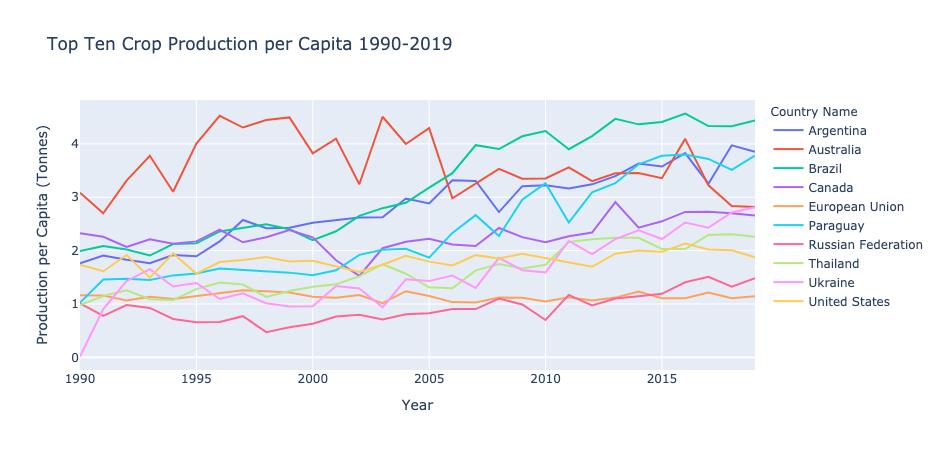

In [37]:
cline = px.line(top_10_crop, x= 'Time', y= 'per capita', color='Country Name',
                title = 'Top Ten Crop Production per Capita 1990-2019',
                labels = {'Time': 'Year','per capita': 'Production per Capita (Tonnes)'})
cline.show()

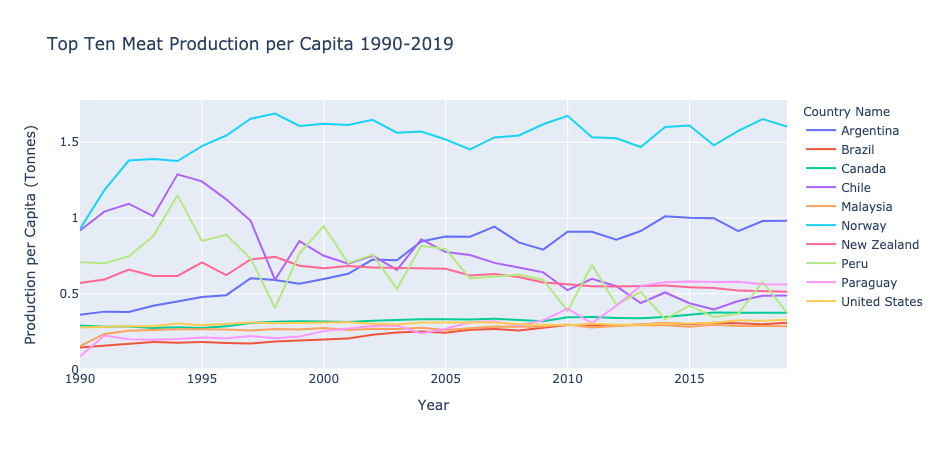

In [38]:
mline = px.line(top_10_meat, x= 'Time', y= 'per capita', color='Country Name',
                labels = {'Time': 'Year','per capita': 'Production per Capita (Tonnes)'},
                title = 'Top Ten Meat Production per Capita 1990-2019')
mline.show()

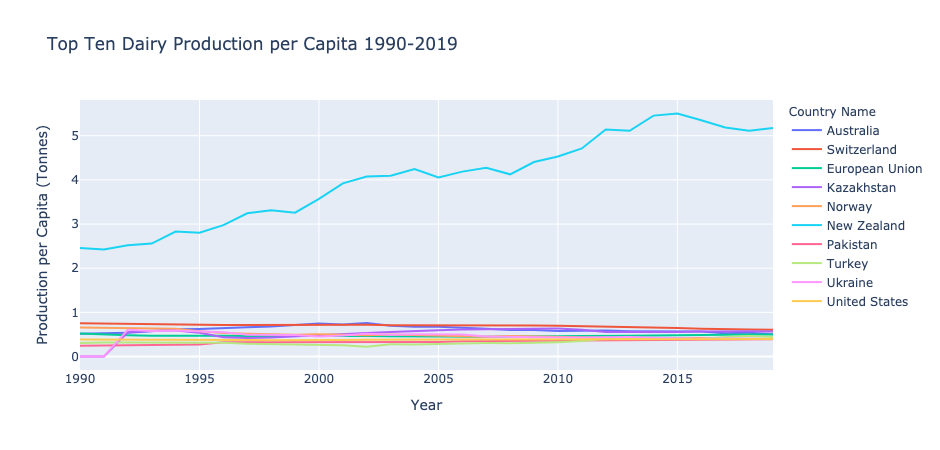

In [39]:
dline = px.line(top_10_dairy, x= 'Time', y= 'per capita', color='Country Name',
                labels = {'Time': 'Year','per capita': 'Production per Capita (Tonnes)'},
                title = 'Top Ten Dairy Production per Capita 1990-2019')
dline.show()

From the line chart of top ten OECD countries with highest crops production per capita ratios, Brazil has demonstrated a dramatic change in their crops production and is currently leading in crops production per capita. Among those top ten countries, Australia is the only country whose trend in crops production per capita ratios has been descending since 1990 while others have rapidly increased their production over the time. The trends in meat production per capita ratios of the top ten countries, on the other hand, have shown a mix of slight to moderate decrease and increase. Norway has significantly increased their animal-based food production to reach over 1.5 tonnes per capita from 1990 to 1995 and remained the top country with highest meat production ratios. Among the countries whose meat production ratios were ascending during the first five years of observation, Argentina has followed a similar pattern to Norway's whereas Chile, Peru, and New Zealand has decreased their meat production per capita over time. The line charts of top ten countries with highest production rates in dairy goods distinguishes New Zealand's pattern of production per capitas from the rest. New Zealand has obtained gradual increase in their dairy production relative to their population from 1990-2015 and a slight decrease during the last five years, yet their dairy production per capita remained the highest among the OECD group. The other top countries have kept their dairy production rates relatively stable over the past three decades.

## Summary of Findings

It was found that in 2019, five countries (China, Brazil, India, United States, and the European Union) were responsible for approximately 65% of the total food consumption and production in the countries tracked in the OECD dataset. While these five entities feed their populations largely off internally produced food, crop and meat imports play a significant role in China and the EU's food markets. The world dairy market was found to be negligible when compared to national internal markets.

In 2019, the amounts of commodities that are produced and consumed have increased compared to 1990. Crops have been the most produced and consumed commodity for most countries over the years with the most notable increase of crop production occurring in Brazil, where the production of crops has sky-rocketed over the last thirty years. The relative proportions of the commodities produced for most countries have remained roughly the same with crops as the largest proportion, although several countries have seen a notable increase in the proportion of dairy in their diets since 1990. Most countries appear to produce more than they consume, though several exceptions to this were identified.

Most countries have increased their crop and meat production since 1990, though some have experienced a trade-off between the two, increasing their meat production at the expense of the crop production capacity. North African and Asian countries (excluding Japan) were observed to have increased their production of dairy products since 1990 by a large margin compared to other regions of the world. The only country that has noticeably decreased their production capacity of all three food commodities is Japan.

Per capita, it was found that Brazil leads the world in crop production, and Australia was found to have a decreasing crop production per capita. Norway produces more meat per capita than any other nation, and New Zealand is unmatched in their production of dairy products per capita.

To continue this investigation, a potential next step would be to compare the national food production and consumption values with national GDPs over time. Such a comparison could observe the impacts of the food market affecting a country's GDP, and how this relative contribution may change depending on the overall size of the country's GDP. Likewise, the comparison could be made between a country's food production capacity and that country's life expectancy statistics. A valuable analysis could involve observing how a nation's life expectancy is affected by a change in that nation's food production capacity.

## References

Nivievskyi, Oleg and Cramon-Taubadel, S. (2008) "The Determinants of Dairy Farming Competitiveness in Ukraine". European Association of Agricultural Economists, 2008(9) [Online]. Available at: https://www.researchgate.net/publication/23509799_The_Determinants_of_Dairy_Farming_Competitiveness_in_Ukraine (Accessed: 20 October 2020)

OECD and Food and Agriculture Organization of the United Nations (2020) ‘OECD-FAO Agricultural Outlook (Edition 2020)’, *OECD Agriculture Statistics (database)* [Online]. Available at: https://www.oecd-ilibrary.org/agriculture-and-food/data/oecd-agriculture-statistics/oecd-fao-agricultural-outlook-edition-2020_4919645f-en (Accessed: 26 September 2020)

OECD iLibrary (2020) *Educators and Students* [Online]. Available at: https://www.oecd-ilibrary.org/oecd/educators (Accessed: 26 September 2020)

Seleshe S, Jo C, et al (2014) "Meat Consumption Culture in Ethiopia", Korean Journal for Food Science of Animal Resources, 34(1) [Online]. Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4597829/# (Accessed: 19 October 2020)

Tilman D, Balzer C, Hill J, et al (2011) ‘Global food demand and the sustainable intensification of agriculture’, *Proceedings of the National Academy of Sciences of the United States of America*, 108 (50) [Online]. Available at: https://doi.org/10.1073/pnas.1116437108 (Accessed:26 September 2020)

The World Bank Group (2020) *Total Population* [Online]. Available at:https://data.worldbank.org/indicator/SP.POP.TOTL?end=2019&start=1977 (Accessed: 27 September 2020)

University of Oregon (2020) *Planning Analysis: Calculating Growth Rates* [Online]. Avalaible at: https://pages.uoregon.edu/rgp/PPPM613/class8a.htm (Accessed: October 19, 2020)

United Nations (2019) *Growing at a slower pace, world population is expected to reach 9.7 billion in 2050 and could peak at nearly 11 billion around 2100* [Online]. Available at: https://www.un.org/development/desa/en/news/population/world-population-prospects-2019.html (Accessed: 26 September 2020)